In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [ ]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

from utils.data_loader import load_data

data_path = "../dataset/spam.csv"
df = load_data(data_path)

In [41]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## General Info

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Missing Values

Will delete the third to fifth columns due to the csv format

In [43]:
df = df[['v1', 'v2']]

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df.isna().sum()

v1    0
v2    0
dtype: int64

## Duplicate Data

In [46]:
df.duplicated().sum()

np.int64(403)

In [47]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [48]:
df.drop_duplicates()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Analysis Target

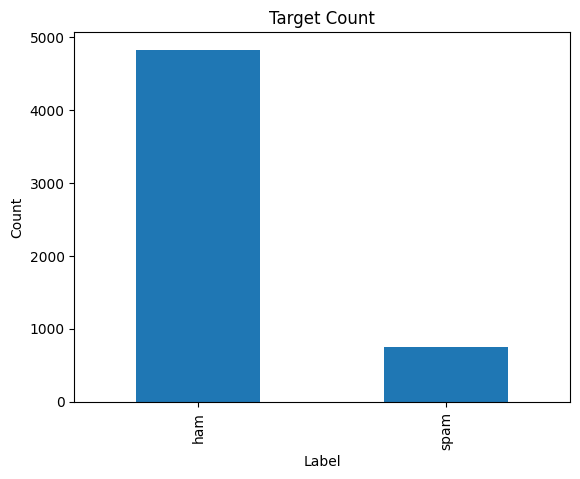

In [49]:
df['v1'].value_counts().plot(kind='bar')

plt.title('Target Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [50]:
pct_count = (df['v1'].value_counts()/len(df))*100
print(pct_count)

v1
ham     86.593683
spam    13.406317
Name: count, dtype: float64


From the graph and percentages above, it can be seen that this dataset is imbalanced with 86% ham

## Text Behaviour Analysis

### Character Length

In [51]:
df['char_count'] = df['v2'].apply(len)

In [52]:
df.groupby('v1')['char_count'].mean()

v1
ham      71.023627
spam    138.866131
Name: char_count, dtype: float64

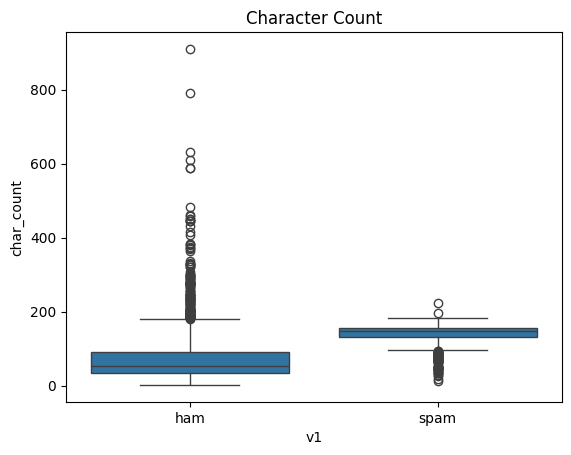

In [53]:
import seaborn as sns

sns.boxplot(x='v1', y='char_count', data=df)
plt.title('Character Count')
plt.show()

### Word Count

In [54]:
df['word_count'] =  df['v2'].apply(lambda x: len(x.split()))

In [55]:
df.groupby('v1')['word_count'].mean()

v1
ham     14.200622
spam    23.851406
Name: word_count, dtype: float64

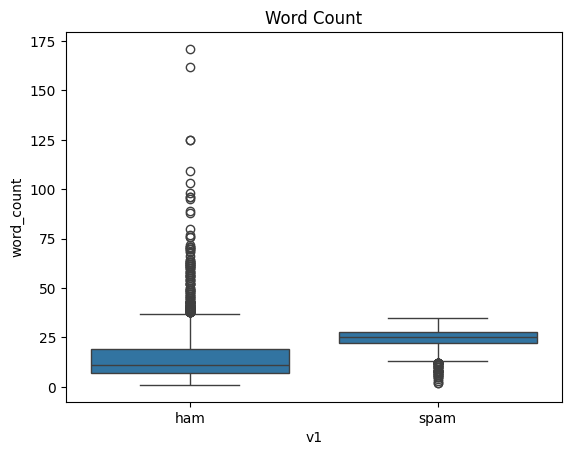

In [56]:
sns.boxplot(x='v1', y='word_count', data=df)
plt.title('Word Count')
plt.show()

### Digit Count

In [57]:
df['digit_count'] = df['v2'].apply(lambda x: sum(c.isdigit() for c in x))

In [58]:
df.groupby('v1')['digit_count'].mean()

v1
ham      0.299275
spam    15.759036
Name: digit_count, dtype: float64

### Summary

In [59]:
spam_mean = df[df['v1']=='spam'][['char_count', 'word_count', 'digit_count']].mean()

ham_mean = df[df['v1']=='ham'][['char_count', 'word_count', 'digit_count']].mean()

comparison = pd.DataFrame({
    'ham': ham_mean,
    'spam': spam_mean,
    'difference': spam_mean-ham_mean
})

comparison

,ham,spam,difference
char_count,71.023627,138.866131,67.842504
word_count,14.200622,23.851406,9.650784
digit_count,0.299275,15.759036,15.459762


Spam messages are longer and contain more numbers than non-spam messages

## Data Cleaning

In [60]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"\d+", " ", text) 
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [61]:
df['v2'] = df['v2'].apply(clean_text)

## Mapping Label

In [62]:
df["v1"] = df["v1"].map({
    "ham": 0,
    "spam": 1
})

## Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

x = df['v2']
y = df['v1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Build Vocabulary

In [64]:
from collections import Counter
import re

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

counter = Counter()
for text in x_train:
    counter.update(tokenize(text))

vocab = {word: i+2 for i, (word, _) in enumerate(counter.items())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1


## Encode Text

In [65]:
import torch

MAX_LEN = 50

def preprocess(text):
    return text.lower()

def encode(text):
    tokens = tokenize(text)
    ids = [vocab.get(t, 1) for t in tokens]
    return ids[:MAX_LEN]

def pad(seq):
    return seq + [0] * (MAX_LEN - len(seq))

x_train_pad = torch.tensor([pad(encode(t)) for t in x_train])
x_test_pad  = torch.tensor([pad(encode(t)) for t in x_test])

y_train_tensor = torch.tensor(y_train.values).float()
y_test_tensor  = torch.tensor(y_test.values).float()


In [66]:
num_pos = (y_train == 1).sum()
num_neg = (y_train == 0).sum()

pos_weight = torch.tensor([num_neg / num_pos])
print("pos_weight:", pos_weight)


pos_weight: tensor([6.4532], dtype=torch.float64)


In [67]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train_pad, y_train_tensor)
test_dataset  = TensorDataset(x_test_pad, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32)


## Modeling

In [68]:
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.gru = nn.GRU(embed_dim, hidden_dim, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        x = self.embedding(x)
        _, h = self.gru(x)
        out = self.fc(h[-1])
        return out.squeeze()


In [69]:
model = GRUModel(len(vocab), 128, 64)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

c:\Users\winon\Documents\Bootcamp\ai-spam-call-detection\venv\Lib\site-packages\torch\nn\modules\rnn.py:1334: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  super().__init__("GRU", *args, **kwargs)


## Training

In [70]:
EPOCHS = 5

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    
    for xb, yb in train_loader:
        optimizer.zero_grad()
        
        outputs = model(xb)
        loss = criterion(outputs, yb)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 167.9109
Epoch 2, Loss: 167.7509
Epoch 3, Loss: 135.4896
Epoch 4, Loss: 74.2020
Epoch 5, Loss: 60.7647


## Evaluation

In [71]:
from sklearn.metrics import classification_report, roc_auc_score
import torch.nn.functional as F

model.eval()
all_preds = []
all_probs = []

with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model(xb)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.4).float()
        
        all_preds.extend(preds.numpy())
        all_probs.extend(probs.numpy())

print(classification_report(y_test, all_preds))
print("ROC-AUC:", roc_auc_score(y_test, all_probs))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       966
           1       0.54      0.95      0.69       149

    accuracy                           0.88      1115
   macro avg       0.76      0.91      0.81      1115
weighted avg       0.93      0.88      0.90      1115

ROC-AUC: 0.9568586991259882


In [72]:
gru_model = model

torch.save(gru_model.state_dict(), "models/gru_models.pth")
print("Saved")

Saved


In [73]:
import pickle

with open("models/gru_vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

print("Saved")

Saved


## Visualization

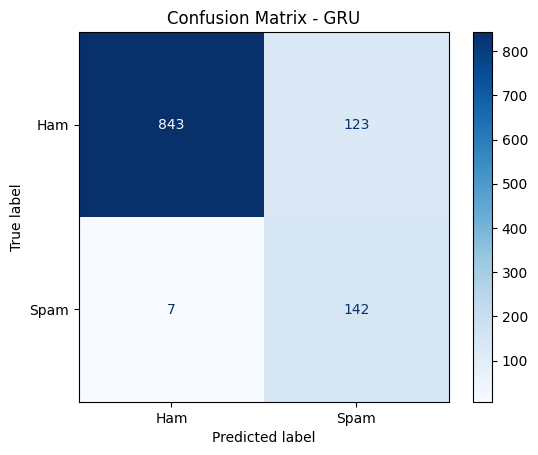

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

cm = confusion_matrix(y_test, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - GRU")
plt.show()

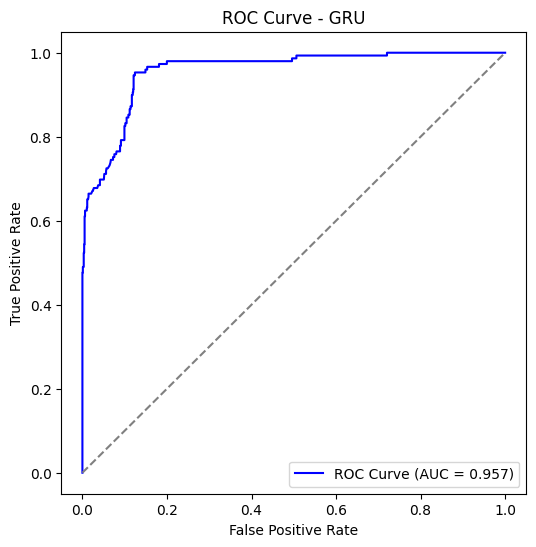

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GRU')
plt.legend(loc='lower right')
plt.show()

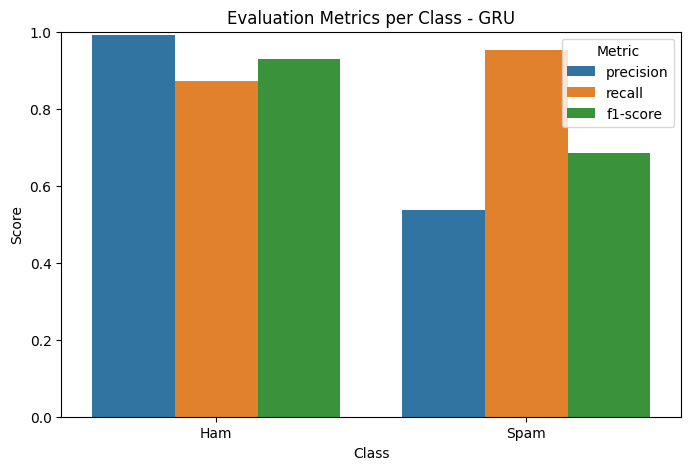

In [81]:
report = classification_report(y_test, all_preds, target_names=['Ham', 'Spam'], output_dict=True)
df = pd.DataFrame(report).transpose().reset_index()
df = df[df['index'].isin(['Ham','Spam'])]
df_melt = df.melt(id_vars='index', value_vars=['precision','recall','f1-score'], 
                  var_name='Metric', value_name='Score')
df_melt.rename(columns={'index':'Class'}, inplace=True)

plt.figure(figsize=(8,5))
sns.barplot(data=df_melt, x='Class', y='Score', hue='Metric')
plt.ylim(0,1)
plt.title('Evaluation Metrics per Class - GRU')
plt.show()